In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, shutil
from keras import models
from keras import layers
from sklearn.metrics import confusion_matrix, f1_score
np.random.seed(123)
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [2]:
directory = 'Alzheimer_s Dataset/'

In [3]:
test_directory = 'Alzheimer_s Dataset/test/'
train_directory = 'Alzheimer_s Dataset/train/'

In [4]:
data_genorator = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [5]:
data_train= data_genorator.flow_from_directory( 
        train_directory, 
        subset= 'training',
        target_size=(224, 224), 
        batch_size = 4098, 
        seed = 123)

Found 4098 images belonging to 4 classes.


In [6]:
data_valid = data_genorator.flow_from_directory( 
        train_directory, 
        subset= 'validation',
        target_size=(224, 224), 
        batch_size = 1023, 
        seed = 123)

Found 1023 images belonging to 4 classes.


In [7]:
data_test= ImageDataGenerator(rescale=1./255).flow_from_directory( 
        test_directory, 
        subset= 'training',
        target_size=(224, 224), 
        batch_size = 1279, 
        seed = 123)

Found 1279 images belonging to 4 classes.


In [18]:
train_images, train_labels = next(data_train)

test_images, test_labels = next(data_test)

valid_images, valid_labels = next(data_valid)

In [19]:
def get_label(array):
    if array[0] ==1:
        return 0
    elif array[1] ==1:
        return 1
    elif array[2] ==1:
        return 2
    elif array[3] ==1:
        return 3

In [20]:
train_label_names = np.apply_along_axis(get_label,1,train_labels)

test_label_names = np.apply_along_axis(get_label,1,test_labels)

valid_label_names = np.apply_along_axis(get_label,1,valid_labels)

In [21]:
train_labels[:9]

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [27]:
train_images.shape

(4098, 224, 224, 3)

In [26]:
x_train = train_images.reshape(4098,150528)

x_test = test_images.reshape(1279,150528)

x_valid = valid_images.reshape(1023,150528)

In [38]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam, SGD
from keras.metrics import Recall, Precision 
from keras.callbacks import EarlyStopping

In [24]:
from imblearn.over_sampling import SMOTE

In [23]:
X_smote.shape

(8192, 150528)

In [24]:
x_train.shape

(4098, 150528)

In [25]:
y_train.shape

(8192, 4, 4)

In [26]:
train_labels.shape

(4098, 4)

In [27]:
y_smote.shape

(8192, 4)

## Basic Convoluted Neural Network

In [42]:
batch_size = 12
num_classes = 4
epochs = 30


y_train = keras.utils.to_categorical(train_labels, num_classes)

y_valid = keras.utils.to_categorical(valid_labels, num_classes)


cnn = models.Sequential()
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224,  3),use_bias=True))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu',use_bias=True))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(layers.Dense(4, activation='softmax'))

cnn.summary()

cnn.compile(loss='categorical_crossentropy',
              optimizer= Adam(),
              metrics=[Recall(),'accuracy'])

early_stop = EarlyStopping(monitor='val_loss',patience=5,verbose=1,mode='auto')

#dont forget to change
history = cnn.fit(train_images, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [early_stop],
                    validation_data=(valid_images, valid_labels))
score = cnn.evaluate(test_images, test_labels, verbose=0)
print('test loss:', score[0])
print('Test recall:', score[1])
print('Test Accuracy', score[2])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 109, 109, 32)      18464     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 93312)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 32)                2986016   
_________________________________________________________________
dense_22 (Dense)             (None, 4)                

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

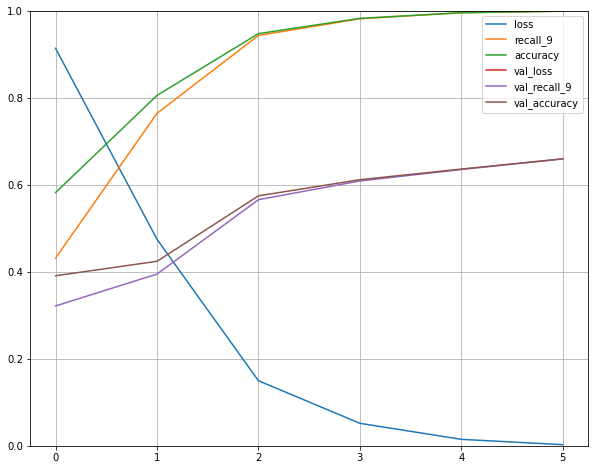

In [44]:
history_df = pd.DataFrame(history.history)
history_df.plot(figsize=(10,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## AlexNet Model

In [49]:
batch_size = 24
num_classes = 4
epochs = 30

alex = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation='softmax')
])

alex.summary()

alex.compile(loss='categorical_crossentropy',
              optimizer= Adam(),
              metrics=[Recall(),'accuracy'])

early_stop = EarlyStopping(monitor='val_loss',patience=5,verbose=1,mode='auto')

alex_history = alex.fit(train_images, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [early_stop],
                    validation_data=(valid_images, valid_labels))

score = alex.evaluate(test_images, test_labels, verbose=0)

print('test loss:', score[0])
print('Test recall:', score[1])
print('Test Accuracy', score[2])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
batch_normalization_15 (Batc (None, 54, 54, 96)        384       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 26, 26, 256)       614656    
_________________________________________________________________
batch_normalization_16 (Batc (None, 26, 26, 256)       1024      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 12, 12, 384)     

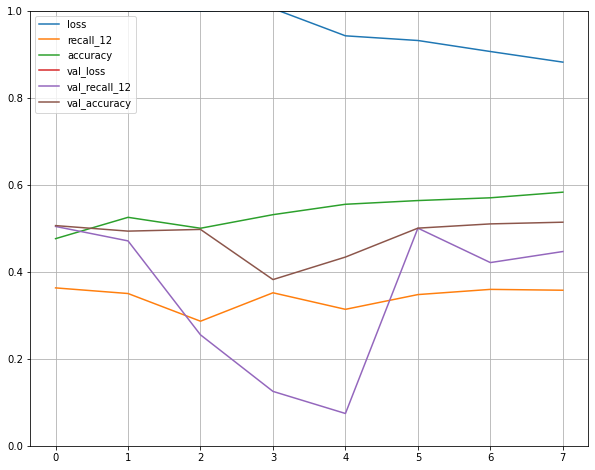

In [50]:
history_df = pd.DataFrame(alex_history.history)
history_df.plot(figsize=(10,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()